# 1  Problem statement

Deutsche Bank is a German multinational investment bank and financial services company headquartered in Frankfurt,Germany
Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants
to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online 
application form.  
🠶 The automation based on the Marrital status,Education,Occupation,Credit history and others. To automate this process,
they have given a problem to identify the customer segments, that are eligible for  loan amounts so that they can 
specifically target these customers. 
🠶 Loan prediction is a very common real-life problem that each retail bank faces at least once in its lifetime. 
If done correctly, it can save a lot of man-hours at the end of a retail bank.

#Col details for this data
'Loan_ID' - Unique loan ID
'Gender' - Male/Female
'Married' - Applicant Married Y/N
'Dependents' - Number of Dependents
'Education' - Gradute or Not
'Self_Employed' - Self employed
'ApplicantIncome' - Applicant income
'CoapplicantIncome' - Coapplicant income
'LoanAmount' - Loan amount in thousands
'Loan_Amount_Term' - Term of loan in months
'Credit_History' - Credict history meet guidelines
'Property_Area'- Urban,Semiurban,Rural
'Loan_Status' - Loan approved Y/N

#Extra col may available took from other data
Feature 
emp_length 	Employment Length
int_rate 	Interest Rate on the loan
home_ownership 	The home ownership status provided by the borrower during registration.Our val are:RENT,OWN,MORTGAGE,OTHER 
purpose 	 Purpose of the loan
dti 	Debt-income ratio of the borrower
deling_2yrs 	The number of 30+ days past-due incidences of  delinquency in the borrower's credit file for the past 2year
revol_util 	The amount of credit the borrower is using relative to all  available revolving credit. 
total_acc 	The total number of credit lines currently in the borrower's  credit file 
verification status 	Verified / Not verified 

# 2 Hypothessis

Below are some of the dependent variable for this loan prediction proble which I think can affect the Loan  Approval:
🠶 Salary: Applicants with high income should have more chances  of getting approval. 
🠶 Previous history: Applicants who have paid their historical debts  have more chances of getting approval. 
🠶 Loan amount: Less the amount higher the chances of getting  approval. 
🠶 Loan term: Less the time period has higher chances of approval. 
🠶 EMI: Lesser the amount to be paid monthly, the higher the  chances of getting approval.

# 3  Data Gathering

It had around 1.5 Mn rows
The number of features were around 51

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [130]:
df=pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 4 EDA

In [131]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [132]:
df.shape

(614, 13)

In [133]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 4.1 Loan_ID

In [135]:
df["Loan_ID"].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [136]:
#Loan ID is unique and we cant correleate it with any dependent and independent feature so we can deop it
df.drop("Loan_ID",axis=1,inplace=True)

In [137]:
df.shape   # Its 12 now previously it was 13

(614, 12)

### 4.2 Gender

In [138]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [139]:
df["Gender"].isna().sum()

13

In [140]:
df["Gender"].mode()[0]

'Male'

In [141]:
df1=df.copy()

In [142]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [143]:
df["Gender"].isna().sum()

0

<AxesSubplot:xlabel='Gender', ylabel='count'>

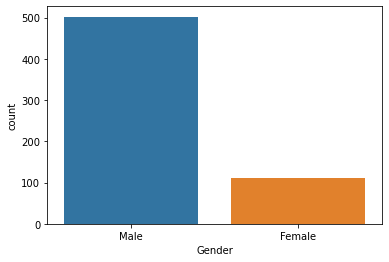

In [144]:
#Univariant Analysis
sns.countplot(df["Gender"])

### 4.3 Married

In [145]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [146]:
df["Married"].isna().sum()

3

In [147]:
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

In [148]:
df["Married"].isna().sum()

0

<AxesSubplot:xlabel='Married', ylabel='count'>

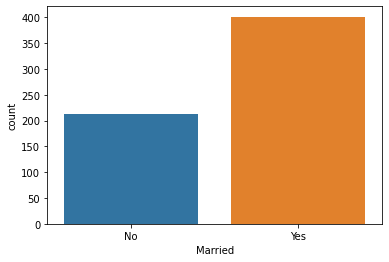

In [149]:
sns.countplot(df["Married"])

### 4.4 Dependents

In [150]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [209]:
df["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [151]:
df["Dependents"].isna().sum()

15

In [152]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

In [153]:
df["Dependents"].isna().sum()

0

<AxesSubplot:xlabel='Dependents', ylabel='count'>

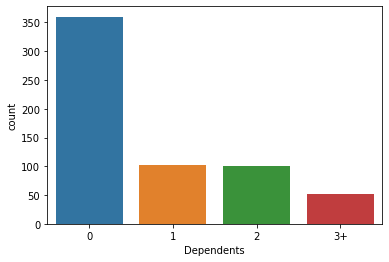

In [154]:
sns.countplot(df["Dependents"])

### 4.5 Education

In [155]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [156]:
df["Education"].isna().sum()

0

<AxesSubplot:xlabel='Education', ylabel='count'>

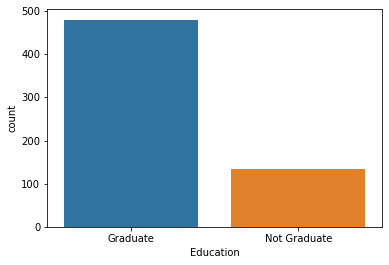

In [157]:
sns.countplot(df["Education"])

### 4.6 Self_Employed

In [158]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [159]:
df["Self_Employed"].isna().sum()

32

In [160]:
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [161]:
df["Self_Employed"].isna().sum()

0

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

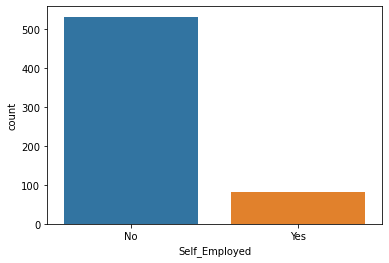

In [162]:
sns.countplot(df["Self_Employed"])

### 4.7 ApplicantIncome

In [163]:
df["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [164]:
df["ApplicantIncome"].isna().sum()

0

<AxesSubplot:xlabel='ApplicantIncome'>

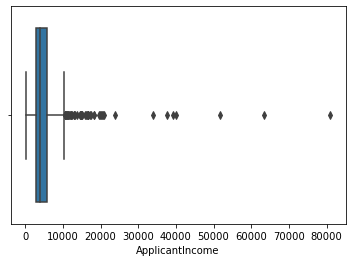

In [165]:
sns.boxplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

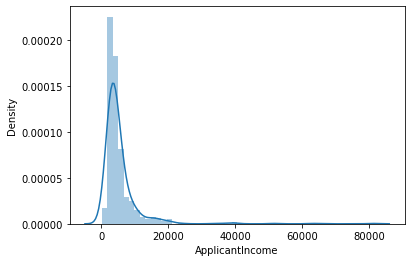

In [166]:
sns.distplot(df["ApplicantIncome"])

The data are skewed left in the graph, which is not a suitable distribution to train a Model.
Hence,we apply the Log Transformation later to normalize the attributes in the form of Bell Curve (Normal Distribution)

### 4.8 CoapplicantIncome

In [167]:
df["CoapplicantIncome"].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [168]:
df["CoapplicantIncome"].isna().sum()

0

<AxesSubplot:xlabel='CoapplicantIncome'>

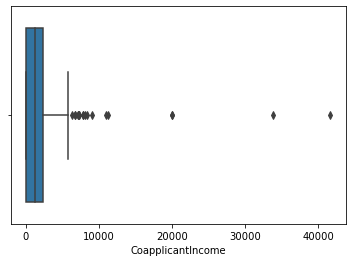

In [169]:
sns.boxplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

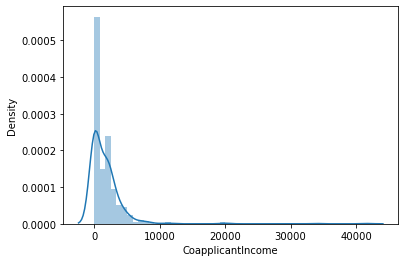

In [170]:
sns.distplot(df["CoapplicantIncome"])

The data are skewed left in the graph, which is not a suitable distribution to train a Model.
Hence,we apply the Log Transformation later to normalize the attributes in the form of Bell Curve (Normal Distribution)

### 4.9 LoanAmount

In [171]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [172]:
df["LoanAmount"].isna().sum()

22

In [173]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [174]:
df["LoanAmount"].isna().sum()

0

<AxesSubplot:xlabel='LoanAmount'>

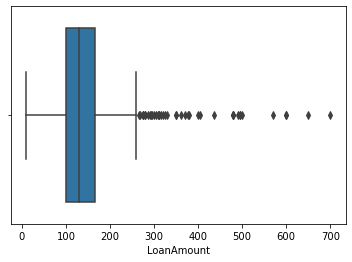

In [175]:
sns.boxplot(df["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

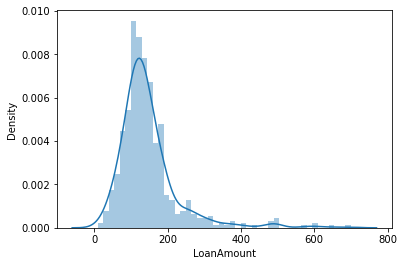

In [176]:
sns.distplot(df["LoanAmount"])

The data are skewed left in the graph, which is not a suitable distribution to train a Model.
Hence,we apply the Log Transformation later to normalize the attributes in the form of Bell Curve (Normal Distribution)

### 4.10  Loan_Amount_Term 

In [177]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [178]:
df["Loan_Amount_Term"].isna().sum()

14

In [179]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [180]:
df["Loan_Amount_Term"].isna().sum()

0

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

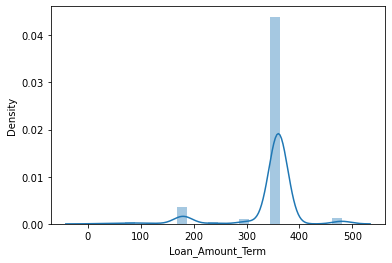

In [181]:
sns.distplot(df['Loan_Amount_Term'])

The data are skewed left in the graph, which is not a suitable distribution to train a Model.
Hence,we apply the Log Transformation later to normalize the attributes in the form of Bell Curve (Normal Distribution)

### 4.11 Credit_History

In [182]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [183]:
df["Credit_History"].isna().sum()

50

In [184]:
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

In [185]:
df["Credit_History"].isna().sum()

0

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

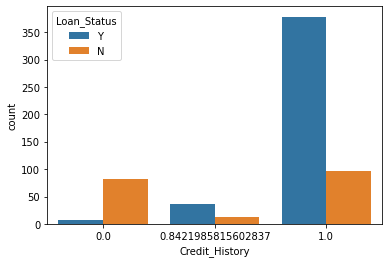

In [186]:
sns.countplot(df["Credit_History"],hue = df["Loan_Status"])

Since the values of credit history are in the range of 0 to 1, we don't need to normalize this graph.

### 4.12 Property_Area

In [187]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [188]:
df["Property_Area"].isna().sum()

0

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

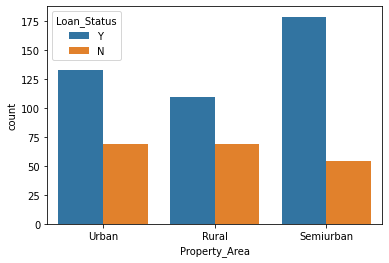

In [189]:
sns.countplot(df["Property_Area"],hue = df["Loan_Status"])

In [190]:
df1 = df.copy()

In [191]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### 4.13 Loan_Status

In [192]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [193]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [194]:
df["Loan_Status"].isna().sum()

0

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

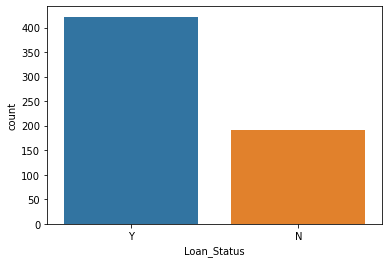

In [195]:
sns.countplot(df["Loan_Status"])

In [196]:
df1["Loan_Status"] = df1["Loan_Status"].replace({"Y":1,"N":0})
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


### Bivariant Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

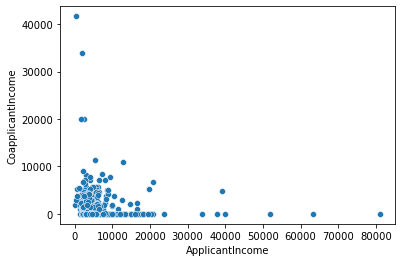

In [197]:
sns.scatterplot(df["ApplicantIncome"],df["CoapplicantIncome"])

### Multivariant Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

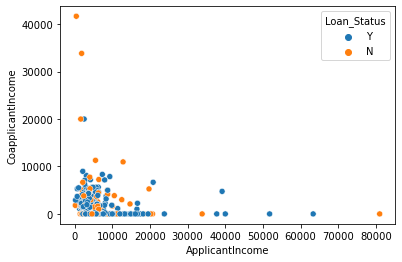

In [198]:
sns.scatterplot(df["ApplicantIncome"],df["CoapplicantIncome"],hue = df["Loan_Status"])

# 5 Feature Engineering

### 5.1 ApplicantIncome

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

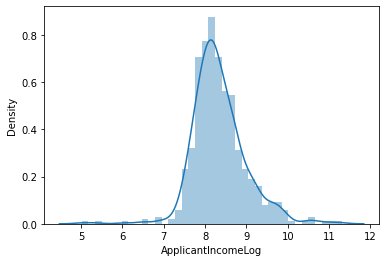

In [199]:
#Handling Outliers
df1['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df1["ApplicantIncomeLog"])    #After Log transformation

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

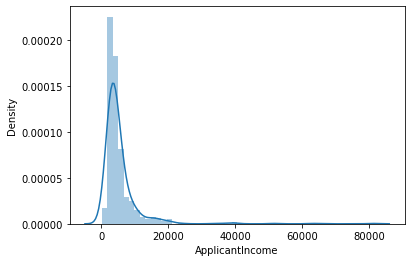

In [200]:
sns.distplot(df["ApplicantIncome"])    #Before log transformation

<AxesSubplot:xlabel='ApplicantIncomeLog'>

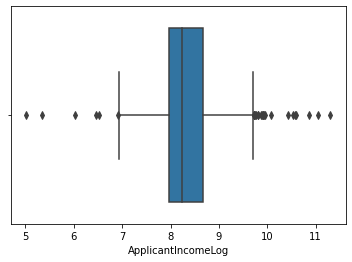

In [201]:
sns.boxplot(df1["ApplicantIncomeLog"]) #After

<AxesSubplot:xlabel='ApplicantIncome'>

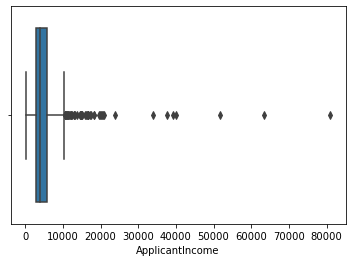

In [202]:
sns.boxplot(df["ApplicantIncome"])   #Before

### 5.2CoapplicantIncome

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

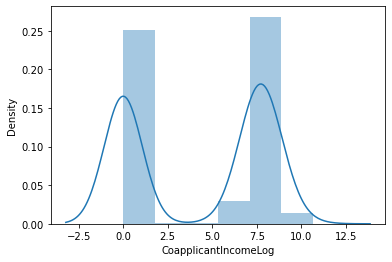

In [203]:
#Handling Outliers
df1['CoapplicantIncomeLog'] = np.log(df1['CoapplicantIncome']+1)
sns.distplot(df1["CoapplicantIncomeLog"])

### 5.3 LoanAmount

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

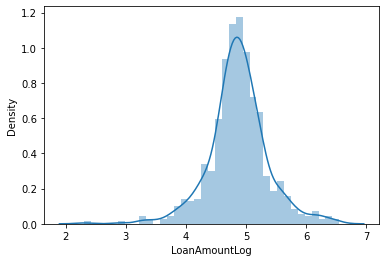

In [204]:
#Handling Outliers
df1['LoanAmountLog'] = np.log(df1['LoanAmount']+1)
sns.distplot(df1["LoanAmountLog"])

In [205]:
df1.drop(columns=['LoanAmount','CoapplicantIncome','ApplicantIncome'],axis=1,inplace=True)

In [206]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog
0,Male,No,0,Graduate,No,360.0,1.0,Urban,1,8.674026,0.000000,4.993232
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0,8.430109,7.319202,4.859812
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1,8.006368,0.000000,4.204693
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1,7.856707,7.765993,4.795791
4,Male,No,0,Graduate,No,360.0,1.0,Urban,1,8.699515,0.000000,4.955827


In [207]:
df1["Gender"] = df["Gender"].replace({"Female":1,"Male":0})

In [210]:
df1["Married"] = df1["Married"].replace({"Yes":1,"No":0})

In [211]:
df1["Dependents"] = df1["Dependents"].replace({"0":0,"1":1,"2":2,"3+":3})

In [212]:
df1["Education"] = df1["Education"].replace({"Graduate":1,"Not Graduate":0})

In [213]:
df1["Self_Employed"] = df1["Self_Employed"].replace({"Yes":1,"No":0})

In [214]:
df1 = pd.get_dummies(df1,columns=["Property_Area"])
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,1,0,360.0,1.0,1,8.674026,0.000000,4.993232,0,0,1
1,0,1,1,1,0,360.0,1.0,0,8.430109,7.319202,4.859812,1,0,0
2,0,1,0,1,1,360.0,1.0,1,8.006368,0.000000,4.204693,0,0,1
3,0,1,0,0,0,360.0,1.0,1,7.856707,7.765993,4.795791,0,0,1
4,0,0,0,1,0,360.0,1.0,1,8.699515,0.000000,4.955827,0,0,1


# 6.Feature Selection

higher density is plotted with dark color and the lower density is plotted with light color.
We need to remove the highly correlated attributes. 

<AxesSubplot:>

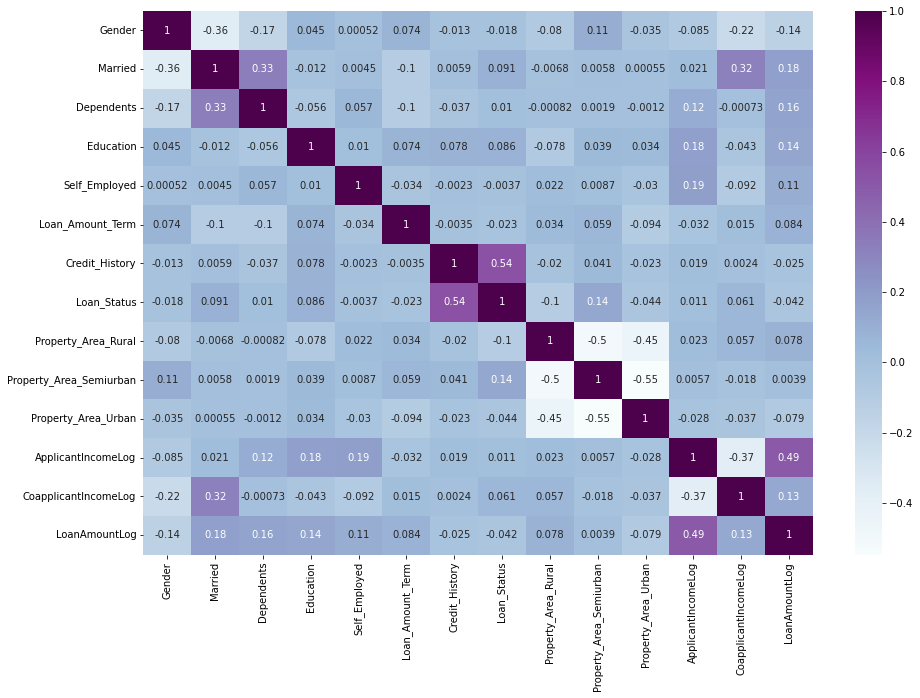

In [63]:
corr = df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

### Embeded Feature Selection method

In [212]:
array = decision_tree_model.feature_importances_
array

array([0.02163941, 0.03465631, 0.0521464 , 0.03521414, 0.01214144,
       0.03678105, 0.2772549 , 0.01619986, 0.04421058, 0.        ,
       0.19962117, 0.092429  , 0.17770575])

<AxesSubplot:>

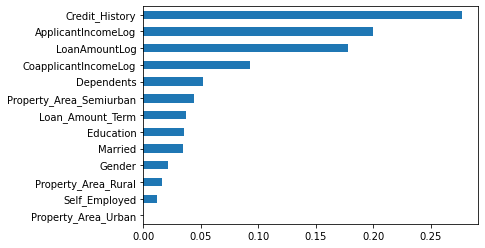

In [213]:
s = pd.Series(array,index=x.columns)
s.sort_values().plot(kind="barh")

This is method of feature selection for decision tree...self_employment,property_area these col are giving less contribution so we can delete that feature

# 7 Model Training/Building

In [40]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,1,0,360.0,1.0,1,8.674026,0.000000,4.993232,0,0,1
1,0,1,1,1,0,360.0,1.0,0,8.430109,7.319202,4.859812,1,0,0
2,0,1,0,1,1,360.0,1.0,1,8.006368,0.000000,4.204693,0,0,1
3,0,1,0,0,0,360.0,1.0,1,7.856707,7.765993,4.795791,0,0,1
4,0,0,0,1,0,360.0,1.0,1,8.699515,0.000000,4.955827,0,0,1


In [223]:
df2= df1.copy()

In [235]:
df1 = df1.drop("Dependents",axis = 1)
df1.head()

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,360.0,1.0,1,8.674026,0.000000,4.993232,0,0,1
1,0,1,1,0,360.0,1.0,0,8.430109,7.319202,4.859812,1,0,0
2,0,1,1,1,360.0,1.0,1,8.006368,0.000000,4.204693,0,0,1
3,0,1,0,0,360.0,1.0,1,7.856707,7.765993,4.795791,0,0,1
4,0,0,1,0,360.0,1.0,1,8.699515,0.000000,4.955827,0,0,1


In [236]:
x=df1.drop("Loan_Status",axis=1)
y=df1["Loan_Status"]

### 7.1 train_test_split

In [237]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42,stratify=y)

# 8 Model Evaluation

### 8.1 Logistic Regression

In [289]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [290]:
#Training
y_pred_train = lr_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confustion matrix\n",cnf_matrix)
print("*"*20)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy",accuracy)
print("*"*20)
clf_report = classification_report(y_train,y_pred_train)
print("classification report\n",clf_report)

confustion matrix
 [[ 61  93]
 [  7 330]]
********************
Accuracy 0.7963340122199593
********************
classification report
               precision    recall  f1-score   support

           0       0.90      0.40      0.55       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491



In [291]:
#Tesing
y_pred_test = lr_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("confustion matrix\n",cnf_matrix)
print("*"*20)
accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy",accuracy)
print("*"*20)
clf_report = classification_report(y_test,y_pred_test)
print("classification report\n",clf_report)

confustion matrix
 [[21 17]
 [ 1 84]]
********************
Accuracy 0.8536585365853658
********************
classification report
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



## 8.2 Decision Tree

In [293]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [294]:
#Training
y_pred_train = dt_model.predict(x_train)

clf_matrix = confusion_matrix(y_train,y_pred_train)
print("clf_matrix  >>>\n",clf_matrix)
print("*"*20)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy  >>>>\n",accuracy)
print("*"*20)

clf_report = classification_report(y_train,y_pred_train)
print("clf_report  >>>>\n",clf_report)

clf_matrix  >>>
 [[154   0]
 [  0 337]]
********************
accuracy  >>>>
 1.0
********************
clf_report  >>>>
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [295]:
#Testing
y_pred_test = dt_model.predict(x_test)
clf_matrix = confusion_matrix(y_test,y_pred_test)
print("clf_matrix  >>>\n",clf_matrix)
print("*"*20)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy  >>>>\n",accuracy)
print("*"*20)

clf_report = classification_report(y_test,y_pred_test)
print("clf_report  >>>>\n",clf_report)

clf_matrix  >>>
 [[24 14]
 [17 68]]
********************
accuracy  >>>>
 0.7479674796747967
********************
clf_report  >>>>
               precision    recall  f1-score   support

           0       0.59      0.63      0.61        38
           1       0.83      0.80      0.81        85

    accuracy                           0.75       123
   macro avg       0.71      0.72      0.71       123
weighted avg       0.75      0.75      0.75       123



### 8.2.1 HyperParameter Tunning`

In [296]:
dt1_model = DecisionTreeClassifier()
hyperparameter = {"criterion":["gini","entropy"],
                 "random_state":[45,43],
                 "max_depth":np.arange(3,8),
                 "min_samples_split":np.arange(2,15),
                 "min_samples_leaf":np.arange(2,10)}      
gscv_dt_clf = GridSearchCV(dt1_model,hyperparameter,cv = 5)
gscv_dt_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [45, 43]})

In [224]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=8,
                       random_state=45)

In [225]:
dt_hyper = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=8,random_state=45)
dt_hyper.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=8,
                       random_state=45)

In [226]:
#Training
y_pred_train = dt_hyper.predict(x_train)

clf_matrix = confusion_matrix(y_train,y_pred_train)
print("clf_matrix  >>>\n",clf_matrix)
print("*"*20)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy  >>>>\n",accuracy)
print("*"*20)

clf_report = classification_report(y_train,y_pred_train)
print("clf_report  >>>>\n",clf_report)

clf_matrix  >>>
 [[ 61  93]
 [  6 331]]
********************
accuracy  >>>>
 0.7983706720977597
********************
clf_report  >>>>
               precision    recall  f1-score   support

           0       0.91      0.40      0.55       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491



In [227]:
#Testing
y_pred_test = dt_hyper.predict(x_test)

clf_matrix = confusion_matrix(y_test,y_pred_test)
print("clf_matrix  >>>\n",clf_matrix)
print("*"*20)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy  >>>>\n",accuracy)
print("*"*20)

clf_report = classification_report(y_test,y_pred_test)
print("clf_report  >>>>\n",clf_report)

clf_matrix  >>>
 [[21 17]
 [ 1 84]]
********************
accuracy  >>>>
 0.8536585365853658
********************
clf_report  >>>>
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



### 8.2.2  Prunning

### 8.2.2.1 Pre prunning..Growing the tree without any condition

In [228]:
decision_tree_model = DecisionTreeClassifier(random_state=45,ccp_alpha=0.0)
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=45)

In [229]:
#Training
y_pred_train = decision_tree_model.predict(x_train)

clf_matrix = confusion_matrix(y_train,y_pred_train)
print("clf_matrix  >>>\n",clf_matrix)
print("*"*20)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy  >>>>\n",accuracy)
print("*"*20)

clf_report = classification_report(y_train,y_pred_train)
print("clf_report  >>>>\n",clf_report)

clf_matrix  >>>
 [[154   0]
 [  0 337]]
********************
accuracy  >>>>
 1.0
********************
clf_report  >>>>
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [230]:
#Testing
y_pred_test = decision_tree_model.predict(x_test)

clf_matrix = confusion_matrix(y_test,y_pred_test)
print("clf_matrix  >>>\n",clf_matrix)
print("*"*20)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy  >>>>\n",accuracy)
print("*"*20)

clf_report = classification_report(y_test,y_pred_test)
print("clf_report  >>>>\n",clf_report)

clf_matrix  >>>
 [[25 13]
 [18 67]]
********************
accuracy  >>>>
 0.7479674796747967
********************
clf_report  >>>>
               precision    recall  f1-score   support

           0       0.58      0.66      0.62        38
           1       0.84      0.79      0.81        85

    accuracy                           0.75       123
   macro avg       0.71      0.72      0.71       123
weighted avg       0.76      0.75      0.75       123



### 8.2.2.2 post prunning

In [231]:
dict_result  = decision_tree_model.cost_complexity_pruning_path(x_train,y_train)

In [232]:
ccp_alpha_list = dict_result["ccp_alphas"]
ccp_alpha_list

array([0.        , 0.00152749, 0.00162933, 0.00178208, 0.00192947,
       0.00196877, 0.00199333, 0.0020127 , 0.0020127 , 0.00227784,
       0.00242292, 0.00244399, 0.00246038, 0.00254582, 0.00259211,
       0.00271555, 0.00277212, 0.00278543, 0.00279151, 0.00282599,
       0.00285132, 0.00285132, 0.00287874, 0.00297013, 0.00305499,
       0.00305499, 0.00313332, 0.00325866, 0.00338286, 0.00338399,
       0.00348033, 0.00349142, 0.00366599, 0.00379335, 0.00382314,
       0.00392784, 0.00406056, 0.00407817, 0.0046368 , 0.00519842,
       0.11256404])

In [233]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha_v in ccp_alpha_list:
    dt_pprunning = DecisionTreeClassifier(random_state=45,ccp_alpha=ccp_alpha_v)
    dt_pprunning.fit(x_train,y_train)
    train_accuracy_list.append(dt_pprunning.score(x_train,y_train)) # Training
    
    test_accuracy_list.append(dt_pprunning.score(x_test,y_test))   # Testing
    
train_accuracy_list

[1.0,
 0.9979633401221996,
 0.9959266802443992,
 0.9938900203665988,
 0.9918533604887984,
 0.9898167006109979,
 0.9877800407331976,
 0.9857433808553971,
 0.9796334012219959,
 0.9755600814663951,
 0.9633401221995926,
 0.9592668024439919,
 0.9572301425661914,
 0.9511201629327902,
 0.9429735234215886,
 0.9348268839103869,
 0.9287169042769857,
 0.9226069246435845,
 0.9185336048879837,
 0.9124236252545825,
 0.9063136456211812,
 0.90020366598778,
 0.8981670061099797,
 0.8981670061099797,
 0.8940936863543788,
 0.8940936863543788,
 0.8940936863543788,
 0.8920570264765784,
 0.8716904276985743,
 0.8676171079429735,
 0.8635437881873728,
 0.8594704684317719,
 0.8533604887983707,
 0.8472505091649695,
 0.8411405295315683,
 0.8370672097759674,
 0.8329938900203666,
 0.8289205702647657,
 0.8187372708757638,
 0.7983706720977597,
 0.6863543788187373]

In [234]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([38, 39], dtype=int64),)

In [235]:
test_accuracy_list[38]

0.8536585365853658

In [236]:
train_accuracy_list[38]

0.8187372708757638

In [237]:
train_accuracy_list[39]

0.7983706720977597

In [238]:
ccp_alpha_list[38]

0.004636795655125594

In [239]:
dt_postpruning = DecisionTreeClassifier(random_state = 42,ccp_alpha =0.004636795655125594)
dt_postpruning.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.004636795655125594, random_state=42)

In [240]:
#Training
y_pred_train = dt_postpruning.predict(x_train)

clf_matrix = confusion_matrix(y_train,y_pred_train)
print("clf_matrix  >>>\n",clf_matrix)
print("*"*20)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy  >>>>\n",accuracy)
print("*"*20)

clf_report = classification_report(y_train,y_pred_train)
print("clf_report  >>>>\n",clf_report)

clf_matrix  >>>
 [[ 73  81]
 [  8 329]]
********************
accuracy  >>>>
 0.8187372708757638
********************
clf_report  >>>>
               precision    recall  f1-score   support

           0       0.90      0.47      0.62       154
           1       0.80      0.98      0.88       337

    accuracy                           0.82       491
   macro avg       0.85      0.73      0.75       491
weighted avg       0.83      0.82      0.80       491



In [241]:
#Testing
y_pred_test = dt_postpruning.predict(x_test)

clf_matrix = confusion_matrix(y_test,y_pred_test)
print("clf_matrix  >>>\n",clf_matrix)
print("*"*20)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy  >>>>\n",accuracy)
print("*"*20)

clf_report = classification_report(y_test,y_pred_test)
print("clf_report  >>>>\n",clf_report)

clf_matrix  >>>
 [[24 14]
 [ 4 81]]
********************
accuracy  >>>>
 0.8536585365853658
********************
clf_report  >>>>
               precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.85      0.95      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.79      0.81       123
weighted avg       0.85      0.85      0.85       123



## 8.3 Adaboost

In [238]:
#Adaboost
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [239]:
#training
y_pred_train = adb.predict(x_train)

clf_matrix = confusion_matrix(y_train,y_pred_train)
print("clf_matrix  >>>\n",clf_matrix)
print("*"*20)
      
accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
print("*"*20)

clf_report = classification_report(y_train,y_pred_train)
print("classification report\n",clf_report)

clf_matrix  >>>
 [[ 86  68]
 [ 10 327]]
********************
accuracy 0.8411405295315683
********************
classification report
               precision    recall  f1-score   support

           0       0.90      0.56      0.69       154
           1       0.83      0.97      0.89       337

    accuracy                           0.84       491
   macro avg       0.86      0.76      0.79       491
weighted avg       0.85      0.84      0.83       491



In [240]:
#testing
y_pred_test = adb.predict(x_test)

clf_matrix = confusion_matrix(y_test,y_pred_test)
print("clf_matrix  >>>\n",clf_matrix)
print("*"*20)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
print("*"*20)

clf_report = classification_report(y_test,y_pred_test)
print("classification report\n",clf_report)

clf_matrix  >>>
 [[23 15]
 [ 6 79]]
********************
accuracy 0.8292682926829268
********************
classification report
               precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.84      0.93      0.88        85

    accuracy                           0.83       123
   macro avg       0.82      0.77      0.78       123
weighted avg       0.83      0.83      0.82       123



# Taking User input

In [241]:
#df1.loc[0,:]
Gender                     = "Male"
Married                     = "Yes"
Education                   = "Graduate"
Self_Employed               = "No"
Loan_Amount_Term            = 180
Credit_History              = 1
ApplicantIncomeLog          = 50000
CoapplicantIncomeLog        = 0
LoanAmountLog               = 180
Property_Area               = "Rural"

#Loan_Status               

In [242]:
Project_data = {"Gender":{"Female":1,"Male":0},
               "Married":{"Yes":1,"No":0},
               "Education": {"Graduate":1,"Not Graduate":0},
               "Self_Employed":{"Yes":1,"No":0},
                "columns":list(x.columns)}

In [243]:
Project_data

{'Gender': {'Female': 1, 'Male': 0},
 'Married': {'Yes': 1, 'No': 0},
 'Education': {'Graduate': 1, 'Not Graduate': 0},
 'Self_Employed': {'Yes': 1, 'No': 0},
 'columns': ['Gender',
  'Married',
  'Education',
  'Self_Employed',
  'Loan_Amount_Term',
  'Credit_History',
  'ApplicantIncomeLog',
  'CoapplicantIncomeLog',
  'LoanAmountLog',
  'Property_Area_Rural',
  'Property_Area_Semiurban',
  'Property_Area_Urban']}

In [244]:
x.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History', 'ApplicantIncomeLog', 'CoapplicantIncomeLog',
       'LoanAmountLog', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [245]:
col_names = x.columns
test_array = np.zeros(len(x.columns),dtype= int)
test_array[0] = Project_data["Gender"][Gender]
test_array[1] = Project_data["Married"][Married] 
test_array[2] = Project_data["Education"][Education]
test_array[3] = Project_data["Self_Employed"][Self_Employed]
test_array[4] = Loan_Amount_Term
test_array[5] = Credit_History
test_array[6] = ApplicantIncomeLog
test_array[7] = CoapplicantIncomeLog
test_array[8] = LoanAmountLog
Property_Area = "Property_Area_"  + Property_Area
Property_Area_index = np.where(col_names == Property_Area)[0][0]
test_array[Property_Area_index] =1
test_array

array([    0,     1,     1,     0,   180,     1, 50000,     0,   180,
           1,     0,     0])

In [246]:
import json
with open("project_data.json","w") as f:
    json.dump(Project_data,f)

In [247]:
import pickle
with open("adaboost_model.pkl","wb") as f:
    pickle.dump(adb,f)

In [248]:
adb.predict([test_array])[0]

1